In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import  adfuller

In [2]:
df = pd.read_csv("./Data/p5.csv", parse_dates=['Date'])
df = df.sort_values('Date')
df.set_index('Date')
df.head()

,Date,Open,High,Low,Close,Volume
0,2006-01-03,34.29,34.29,33.20,33.52,3011402
1,2006-01-04,33.43,33.85,33.42,33.82,2608419
2,2006-01-05,33.82,34.20,33.73,33.86,1964803
3,2006-01-06,34.23,34.30,33.81,34.06,5064600
4,2006-01-09,34.00,34.74,33.99,34.71,6648959


In [3]:
close = df['Close']

In [5]:
adf_original = adfuller(close)
p_val = adf_original[1]
print("ADF Statistic: ", adf_original[0])
print("p-value: ", p_val)

if p_val > 0.05:
    print("Fail to reject Null Hypothesis")
else:
    print("Reject null hypothesis")

ADF Statistic:  -0.9169719313810456
p-value:  0.7823319492318603
Fail to reject Null Hypothesis


In [33]:
close_diff = close.diff(periods=365).dropna()

In [35]:
adf_diff = adfuller(close_diff)

diff_p_val = adf_diff[1]

print("ADF Statistic (Differenced): ", adf_diff[0])
print("p-value (Differenced): ", diff_p_val)

if diff_p_val > 0.05:
    print("Fail to reject Null Hypothesis")
else:
    print("Reject Null Hypothesis")

ADF Statistic (Differenced):  -2.580441662866321
p-value (Differenced):  0.09710732837874458
Fail to reject Null Hypothesis


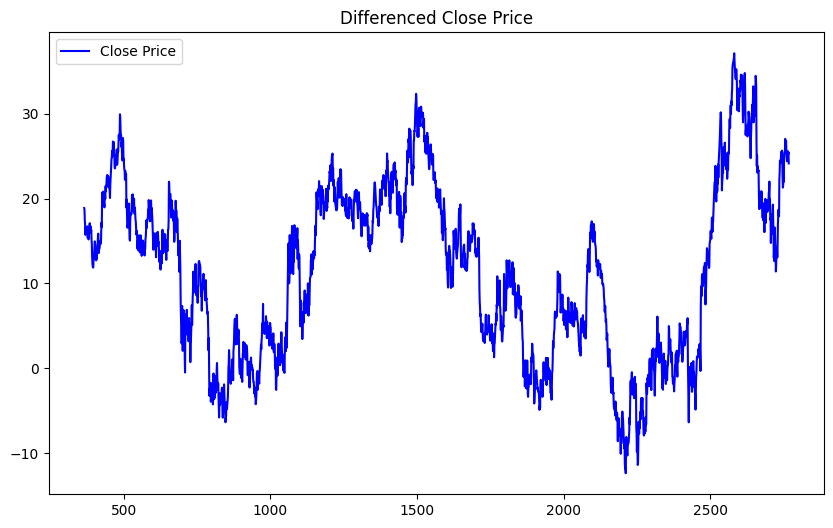

In [37]:
plt.figure(figsize=(10, 6))
plt.plot(close_diff, color='blue', label='Close Price')
plt.title("Differenced Close Price")
plt.legend()
plt.show()